## 線形モデル

In [2]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

w[0]: 0.393906  b: -0.031804


### 線形回帰 特徴量1つ

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

 - coef_ : 傾き
 - intercept_ : 切片

In [5]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


### 特徴量が複数

In [34]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

#### 過剰適合

In [12]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


### リッジ回帰

正則化(傾きを緩やかにする)として重みwの平方和を加える

In [15]:
from sklearn.linear_model import Ridge

ridgh = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridgh.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridgh.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


#### alpha値で汎化性能を上げる or 訓練予測を上げるかの調整ができる

In [18]:
ridgh10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridgh10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridgh10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [19]:
ridgh01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridgh01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridgh01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


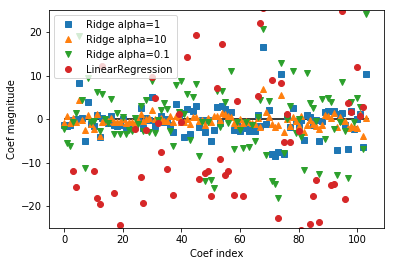

In [25]:
import matplotlib.pyplot as plt
plt.plot(ridgh.coef_, 's', label="Ridge alpha=1")
plt.plot(ridgh10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridgh01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coef index")
plt.ylabel("Coef magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

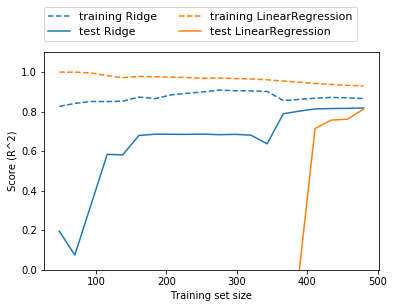

In [26]:
mglearn.plots.plot_ridge_n_samples()